In [1]:
#radioactive decay

In [34]:
t, k, R0 = var('t, k, R0')
R = function('R')(t)
#a
decay_deq = diff(R, t) == -k * R(t)
decay_sol(t, k, R0) = desolve(decay_deq, [R, t], ics=[0, R0])
decay_sol

(t, k, R0) |--> R0*e^(-k*t)

In [23]:
#b
t12 = var('t12') #T1/2
kf(t12) = solve(decay_sol(t12, k, R0) == R0 / 2, k, solution_dict=True)[0][k]
kf(t12)

log(2)/t12

In [26]:
#c
print(numerical_approx(kf(5730)))
print(kf(4.468 * 10^9))
print(kf(706 * 10^6))

0.000120968094338559
(2.23813786929275e-10)*log(2)
1/706000000*log(2)


In [15]:
#d
#R0 = 3, R(2) = 0.9
solve(decay_sol(2, k, 3) == 0.9, k)

[k == log(-1/3*sqrt(10)*sqrt(3)), k == log(1/3*sqrt(10)*sqrt(3))]

In [17]:
k_d = log(1/3*sqrt(10)*sqrt(3))
solve(decay_sol(t12, k_d, R0) == R0 / 2, t12, solution_dict=True)[0][t12]

log(2)/log(1/3*sqrt(10)*sqrt(3))

In [18]:
#thermal cooling model

In [19]:
#a
t, k, Ta, T0 = var('t, k, Ta, T0')
T = function('T')(t)
thermal_deq = diff(T, t) == -k*(T(t) - Ta)
thermal_sol(t, k, Ta, T0) = desolve(thermal_deq, [T, t], ics=[0, T0])
thermal_sol

(t, k, Ta, T0) |--> (Ta*e^(k*t) + T0 - Ta)*e^(-k*t)

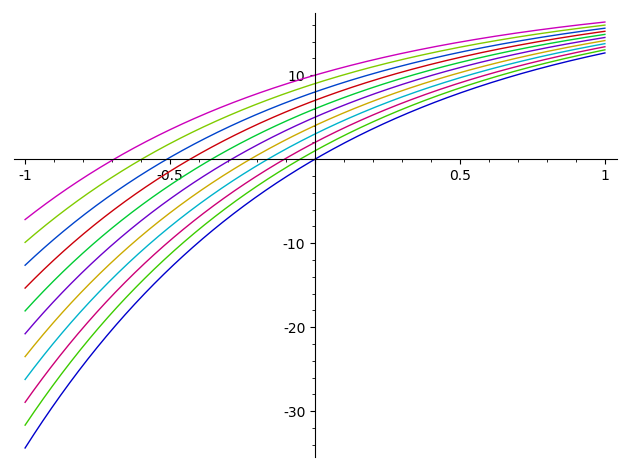

In [20]:
#b
sols = [thermal_sol(t, 1, 20, i) for i in [0..10]]
plot(sols)

In [33]:
#this one is not correct yet, still working on it
#c
#at 11.30 -> 34.22C, at 12.30 -> 34.11C
#Ta = 21
#T(0) = 36.5C
#let t1 -> time passed to the first measurement
t1 = var('t1')
syst = [thermal_sol(t1, k, 21, 36.5) == 34.22, thermal_sol(t1 + 1, k, 21, 36.5) == 34.11]
solve(syst, t1, k, solution_dict=True)[0][t1]

(2*I*pi*z78 + log(545357767376896/465137399014359))/(log(1090715534753792/922534236169175) - log(545357767376896/465137399014359))